<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(2)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_2'

In [4]:
os.listdir(base_path)

['data_add_delta_2_n250.csv',
 'data_add_delta_2_n120.csv',
 'data_add_delta_2_n60.csv',
 'data_add_delta_2_n30.csv',
 'data_add_delta_2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,39.143814,79.441625,25.542980,154.128419,140.389822,13.738597
1,0.0,1.0,52.175639,89.010149,-20.012245,131.173543,170.529714,-39.356171
2,0.0,2.0,56.547198,94.592051,203.862457,365.001706,184.081903,180.919803
3,0.0,3.0,67.847708,55.963693,-35.941903,97.869497,142.133519,-44.264022
4,0.0,4.0,38.121235,49.593548,-31.417458,66.297325,95.807826,-29.510501
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,72.714424,51.059283,-14.695819,119.077888,129.035223,-9.957335
249996,999.0,246.0,77.666190,68.818311,50.093710,206.578212,153.952226,52.625986
249997,999.0,247.0,49.344994,97.092492,23.638558,180.076044,156.809006,23.267038
249998,999.0,248.0,30.710320,76.950086,117.395958,235.056364,115.310753,119.745611


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,39.143814,79.441625,25.542980,154.128419,140.389822,13.738597
1,0.0,1.0,52.175639,89.010149,-20.012245,131.173543,170.529714,-39.356171
2,0.0,2.0,56.547198,94.592051,203.862457,365.001706,184.081903,180.919803
3,0.0,3.0,67.847708,55.963693,-35.941903,97.869497,142.133519,-44.264022
4,0.0,4.0,38.121235,49.593548,-31.417458,66.297325,95.807826,-29.510501
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,72.714424,51.059283,-14.695819,119.077888,129.035223,-9.957335
249996,999.0,246.0,77.666190,68.818311,50.093710,206.578212,153.952226,52.625986
249997,999.0,247.0,49.344994,97.092492,23.638558,180.076044,156.809006,23.267038
249998,999.0,248.0,30.710320,76.950086,117.395958,235.056364,115.310753,119.745611


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    39.143814  79.441625   25.542980  154.128419  140.389822   
      1.0    52.175639  89.010149  -20.012245  131.173543  170.529714   
      2.0    56.547198  94.592051  203.862457  365.001706  184.081903   
      3.0    67.847708  55.963693  -35.941903   97.869497  142.133519   
      4.0    38.121235  49.593548  -31.417458   66.297325   95.807826   
...                ...        ...         ...         ...         ...   
999.0 245.0  72.714424  51.059283  -14.695819  119.077888  129.035223   
      246.0  77.666190  68.818311   50.093710  206.578212  153.952226   
      247.0  49.344994  97.092492   23.638558  180.076044  156.809006   
      248.0  30.710320  76.950086  117.395958  235.056364  115.310753   
      249.0  65.677364  23.613732   42.617168  141.908264   91.153396   

                  e_hat  
rep   index              
0.0   0.0     13.738597  
      1.0    -39.356171  
      2.0    180.919803  
      3.0    -44.264022  
      4.0    -29.510501  
...                 ...  
999.0 245.0   -9.957335  
      246.0   52.625986  
      247.0   23.267038  
      248.0  119.745611  
      249.0   50.754868  

[250000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    39.143814  79.441625   25.542980  154.128419  140.389822   
      1.0    52.175639  89.010149  -20.012245  131.173543  170.529714   
      2.0    56.547198  94.592051  203.862457  365.001706  184.081903   
      3.0    67.847708  55.963693  -35.941903   97.869497  142.133519   
      4.0    38.121235  49.593548  -31.417458   66.297325   95.807826   
...                ...        ...         ...         ...         ...   
999.0 245.0  72.714424  51.059283  -14.695819  119.077888  129.035223   
      246.0  77.666190  68.818311   50.093710  206.578212  153.952226   
      247.0  49.344994  97.092492   23.638558  180.076044  156.809006   
      248.0  30.710320  76.950086  117.395958  235.056364  115.310753   
      249.0  65.677364  23.613732   42.617168  141.908264   91.153396   

                  e_hat  
rep   index              
0.0   0.0     13.738597  
      1.0    -39.356171  
      2.0    180.919803  
      3.0    -44.264022  
      4.0    -29.510501  
...                 ...  
999.0 245.0   -9.957335  
      246.0   52.625986  
      247.0   23.267038  
      248.0  119.745611  
      249.0   50.754868  

[250000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,39.143814,79.441625,25.542980,154.128419,140.389822,13.738597
1,0.0,1.0,52.175639,89.010149,-20.012245,131.173543,170.529714,-39.356171
2,0.0,2.0,56.547198,94.592051,203.862457,365.001706,184.081903,180.919803
3,0.0,3.0,67.847708,55.963693,-35.941903,97.869497,142.133519,-44.264022
4,0.0,4.0,38.121235,49.593548,-31.417458,66.297325,95.807826,-29.510501
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,72.714424,51.059283,-14.695819,119.077888,129.035223,-9.957335
249996,999.0,246.0,77.666190,68.818311,50.093710,206.578212,153.952226,52.625986
249997,999.0,247.0,49.344994,97.092492,23.638558,180.076044,156.809006,23.267038
249998,999.0,248.0,30.710320,76.950086,117.395958,235.056364,115.310753,119.745611


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    39.143814  79.441625   25.542980  154.128419  140.389822   
      1.0    52.175639  89.010149  -20.012245  131.173543  170.529714   
      2.0    56.547198  94.592051  203.862457  365.001706  184.081903   
      3.0    67.847708  55.963693  -35.941903   97.869497  142.133519   
      4.0    38.121235  49.593548  -31.417458   66.297325   95.807826   
...                ...        ...         ...         ...         ...   
999.0 245.0  72.714424  51.059283  -14.695819  119.077888  129.035223   
      246.0  77.666190  68.818311   50.093710  206.578212  153.952226   
      247.0  49.344994  97.092492   23.638558  180.076044  156.809006   
      248.0  30.710320  76.950086  117.395958  235.056364  115.310753   
      249.0  65.677364  23.613732   42.617168  141.908264   91.153396   

                  e_hat  
rep   index              
0.0   0.0     13.738597  
      1.0    -39.356171  
      2.0    180.919803  
      3.0    -44.264022  
      4.0    -29.510501  
...                 ...  
999.0 245.0   -9.957335  
      246.0   52.625986  
      247.0   23.267038  
      248.0  119.745611  
      249.0   50.754868  

[250000 rows x 6 columns]

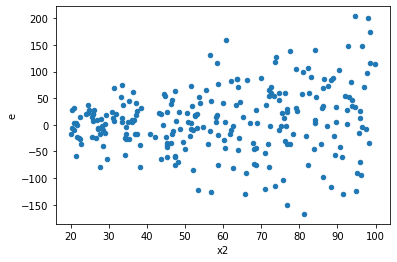

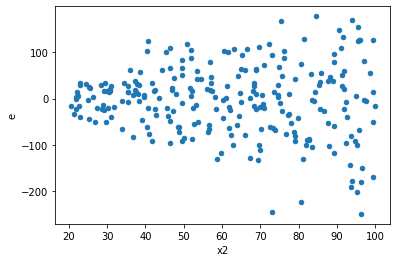

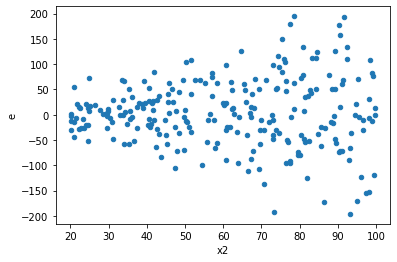

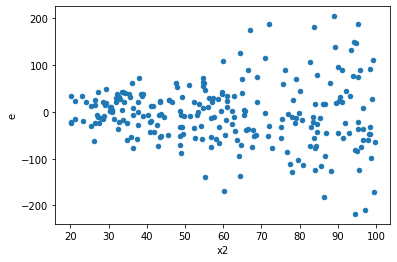

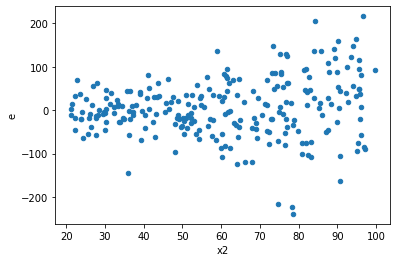

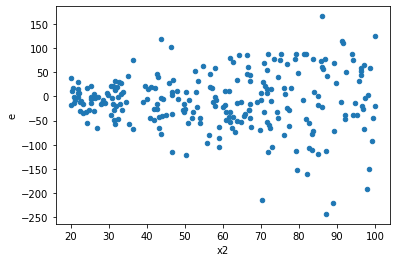

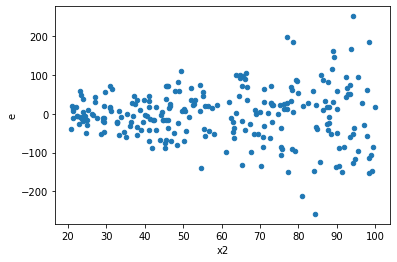

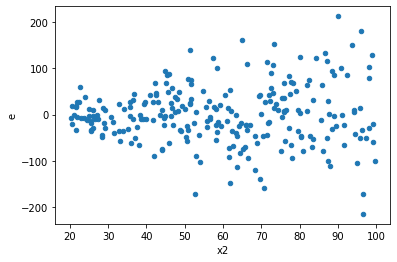

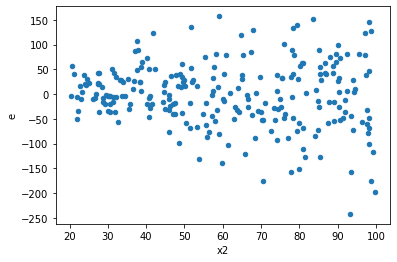

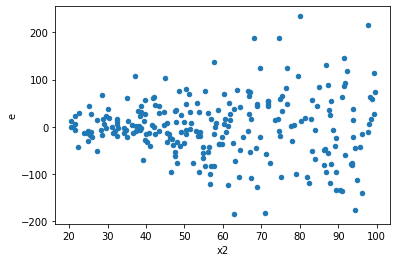

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,98.0,98.0,207081.95427045188,517172.5162275665,2113.0811660250192,5277.2705737506785,2.497429184737807,8.845914623245577e-06,0.9999955770426884,4.422957311622788e-06,Reject005=0 : Heteroscedasticity
1.0,98.0,98.0,338162.344259678,757511.952467228,3450.6361659150816,7729.7138006860005,2.2400836915346423,8.497083977387909e-05,0.9999575145801131,4.2485419886939546e-05,Reject005=0 : Heteroscedasticity
2.0,98.0,98.0,245552.62293192328,594409.3428278948,2505.639009509421,6065.401457427499,2.4207004418465865,1.7329642518992827e-05,0.9999913351787405,8.664821259496414e-06,Reject005=0 : Heteroscedasticity
3.0,98.0,98.0,194834.8873635067,644757.2687455303,1988.111095545987,6579.1558035258195,3.309249577785296,9.168146242188868e-09,0.9999999954159269,4.584073121094434e-09,Reject005=0 : Heteroscedasticity
4.0,98.0,98.0,200973.49664174076,658827.1570686668,2050.7499657320486,6722.726092537416,3.278179302632649,1.1805570077072502e-08,0.999999994097215,5.902785038536251e-09,Reject005=0 : Heteroscedasticity
5.0,98.0,98.0,254851.45136629502,400338.78596301936,2600.525013941786,4085.089652683871,1.5708711244010813,0.026390486583789396,0.9868047567081053,0.013195243291894698,Reject005=0 : Heteroscedasticity
6.0,98.0,98.0,245584.92566073313,732969.1173506317,2505.9686291911544,7479.276707659507,2.984585130290947,1.34380188754335e-07,0.9999999328099056,6.71900943771675e-08,Reject005=0 : Heteroscedasticity
7.0,98.0,98.0,275998.3183700931,565980.0337743197,2816.309371123399,5775.306467084894,2.050664790701307,0.0004502384079236865,0.9997748807960382,0.00022511920396184326,Reject005=0 : Heteroscedasticity
8.0,98.0,98.0,233800.01327658587,569336.7560900694,2385.7144211896516,5809.558735612954,2.435144241914747,1.526632980075604e-05,0.9999923668350996,7.63316490037802e-06,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,98.0,98.0,207081.95427045188,517172.5162275665,2113.0811660250192,5277.2705737506785,2.497429184737807,8.845914623245577e-06,Reject005=0 : Heteroscedasticity
1.0,98.0,98.0,338162.344259678,757511.952467228,3450.6361659150816,7729.7138006860005,2.2400836915346423,8.497083977387909e-05,Reject005=0 : Heteroscedasticity
2.0,98.0,98.0,245552.62293192328,594409.3428278948,2505.639009509421,6065.401457427499,2.4207004418465865,1.7329642518992827e-05,Reject005=0 : Heteroscedasticity
3.0,98.0,98.0,194834.8873635067,644757.2687455303,1988.111095545987,6579.1558035258195,3.309249577785296,9.168146242188868e-09,Reject005=0 : Heteroscedasticity
4.0,98.0,98.0,200973.49664174076,658827.1570686668,2050.7499657320486,6722.726092537416,3.278179302632649,1.1805570077072502e-08,Reject005=0 : Heteroscedasticity
5.0,98.0,98.0,254851.45136629502,400338.78596301936,2600.525013941786,4085.089652683871,1.5708711244010813,0.026390486583789396,Reject005=0 : Heteroscedasticity
6.0,98.0,98.0,245584.92566073313,732969.1173506317,2505.9686291911544,7479.276707659507,2.984585130290947,1.34380188754335e-07,Reject005=0 : Heteroscedasticity
7.0,98.0,98.0,275998.3183700931,565980.0337743197,2816.309371123399,5775.306467084894,2.050664790701307,0.0004502384079236865,Reject005=0 : Heteroscedasticity
8.0,98.0,98.0,233800.01327658587,569336.7560900694,2385.7144211896516,5809.558735612954,2.435144241914747,1.526632980075604e-05,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    964
Reject005=1 : Homoscedasticity       36
Name: Result_test, dtype: int64